In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

%matplotlib inline

In [2]:
percentage_list = np.linspace(10,100,num=10,dtype=np.int)
percentage_list

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

In [4]:
# analysis function
# will provide statistical analysis for waiting time, in_lift_time and their graphs

# read file
def compute_statistic(file_name_template:str,file_list:list):
    data = {}
    stat = {}
    stat["occupancy"] = []
    stat["count"] = []    
    stat["avg_waiting"] = []
    stat["std_waiting"] = []
    stat["min_waiting"] = []
    stat["max_waiting"] = []
    stat["avg_in_lift"] = []
    stat["std_in_lift"] = []
    stat["min_in_lift"] = []
    stat["max_in_lift"] = []
    stat["avg_total"] = []
    stat["std_total"] = []
    stat["min_total"] = []
    stat["max_total"] = []
    for file in file_list:
        file_name = file_name_template.format(file)
        df = pd.read_csv(file_name,names=["name","start_time","end_time","from","to","waiting","in_lift","total"])
        df_desc = df.describe()
        data[file] = df
        stat["occupancy"].append(file)
        stat["count"].append(df_desc.loc["count","total"])
        stat["avg_waiting"].append(df_desc.loc["mean","waiting"])
        stat["std_waiting"].append(df_desc.loc["std","waiting"])
        stat["min_waiting"].append(df_desc.loc["min","waiting"])
        stat["max_waiting"].append(df_desc.loc["max","waiting"])
        stat["avg_in_lift"].append(df_desc.loc["mean","in_lift"])
        stat["std_in_lift"].append(df_desc.loc["std","in_lift"])
        stat["min_in_lift"].append(df_desc.loc["min","in_lift"])
        stat["max_in_lift"].append(df_desc.loc["max","in_lift"])
        stat["avg_total"].append(df_desc.loc["mean","total"])
        stat["std_total"].append(df_desc.loc["std","total"])
        stat["min_total"].append(df_desc.loc["min","total"])
        stat["max_total"].append(df_desc.loc["max","total"])
    return pd.DataFrame(stat),data

In [5]:
def plot_stats(stats,name,xlabel,ylabel,title,legend="upper left"):
    """
    name: waiting, in_lift, or total
    """
    results = sm.OLS(stats["avg_"+name],sm.add_constant(stats.occupancy)).fit()
    print(results.summary())

    fig = plt.figure(figsize=(7,5))
    ax = fig.add_subplot(111)
    ax.plot(stats.occupancy,stats["avg_"+name],"-o",label="mean")
    ax.plot(stats.occupancy,stats["avg_"+name]+stats["std_"+name],"-o",label="+stdev")
    ax.plot(stats.occupancy,stats["avg_"+name]-stats["std_"+name],"-o",label="-stdev")
    # plot the regression line
    X_plot = np.linspace(0,110)
    ax.plot(X_plot, X_plot*results.params[1] + results.params[0],label="regression")
    ax.plot(stats.occupancy,stats["min_"+name],"-o",label="min")
    ax.plot(stats.occupancy,stats["max_"+name],"-o",label="max")
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(loc=legend)
    ax.set_title(title)
    #ax.set_xlim(dates_list[0],dates_list[-1])

# Evacuation Scenario

In [6]:
evac_stats,evac_data = compute_statistic("analysis_log_new/evac_attendance_{}.log",percentage_list)

## Average Waiting Time

/Volumes/HD-500GB/Users/nikolausn/Applications/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:            avg_waiting   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     279.5
Date:                Sat, 09 Dec 2017   Prob (F-statistic):           1.66e-07
Time:                        20:46:12   Log-Likelihood:                -31.753
No. Observations:                  10   AIC:                             67.51
Df Residuals:                       8   BIC:                             68.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.0302      4.423      0.233      0.8

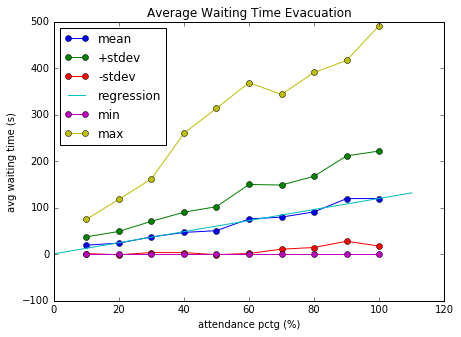

In [7]:
plot_stats(evac_stats,"waiting",xlabel="attendance pctg (%)",ylabel="avg waiting time (s)",title="Average Waiting Time Evacuation")

waiting_time = B0 + B1 * occupancy_percentage
Our Hypothesis for Average Waiting Time in the Evacuation Scenario:
- H0 -> B1 = 0 (there is no relation within occupancy percentage and average waiting time)
- H1 -> B1 != 0

Based on the statistic observation above, we can see that there is linear positive relation between increasing hotel occupancy and average lift waiting time. The linear model can be described by 1.03 + 1.19 * occupancy_percentage, means every increasing value of occupancy percentage the average lift waiting time will be increased by 1.19s.

Furthermore, the p_value for the slope (occupancy_percentage) is close to zero which describes that the linear model is highly significant to correlate occupancy percentage and average waiting time. Therefore, we reject our null hypothesis and accept the hypothesis there is significant positive linear relation within occupancy percentage and average waiting time. 

## Average In Lift Time

/Volumes/HD-500GB/Users/nikolausn/Applications/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:            avg_in_lift   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     44.83
Date:                Sat, 09 Dec 2017   Prob (F-statistic):           0.000153
Time:                        20:46:13   Log-Likelihood:                -26.617
No. Observations:                  10   AIC:                             57.23
Df Residuals:                       8   BIC:                             57.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         44.4193      2.647     16.783      0.0

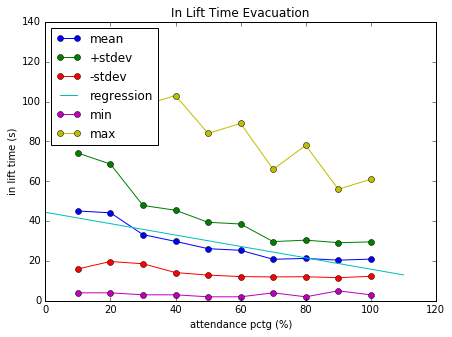

In [8]:
plot_stats(evac_stats,"in_lift",xlabel="attendance pctg (%)",ylabel="in lift time (s)",title="In Lift Time Evacuation")

in_lift_time = B0 + B1 * occupancy_percentage
Our Hypothesis for Average In Lift Time in the Evacuation Scenario:
- H0 -> B1 = 0 (there is no relation within occupancy percentage and in lift time)
- H1 -> B1 != 0

Based on the statistic observation above, we can see that there is linear negative relation between increasing hotel occupancy and people stay in the lift while travel. The linear model can be described by 44.4193 - 0.2856 * occupancy_percentage, means every increasing value of occupancy percentage the spend time in lift in the evacuation scenario will be decreased by 0.2856 second.

Furthermore, the p_value for the slope is close to zero for 99% confidence interval,  which describes that the linear model is highly significant to correlate occupancy percentage and in lift time. Therefore, we reject our null hypothesis and accept the hypothesis there is significant negative linear relation within occupancy percentage and in lift time. 

# Batch Registration Scenario

In [9]:
batch_reg_stats,batch_reg_data = compute_statistic("analysis_log_new/batch_reg_attendance_{}.log",percentage_list)

## Average Waiting Time

/Volumes/HD-500GB/Users/nikolausn/Applications/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:            avg_waiting   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     524.6
Date:                Sat, 09 Dec 2017   Prob (F-statistic):           1.40e-08
Time:                        20:46:13   Log-Likelihood:                -44.559
No. Observations:                  10   AIC:                             93.12
Df Residuals:                       8   BIC:                             93.72
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -94.8944     15.918     -5.961      0.0

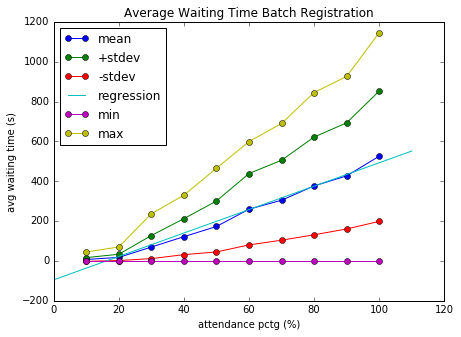

In [10]:
plot_stats(batch_reg_stats,"waiting",xlabel="attendance pctg (%)",ylabel="avg waiting time (s)",title="Average Waiting Time Batch Registration")

waiting_time = B0 + B1 * occupancy_percentage
Our Hypothesis for Average Waiting Time in the Batch Registration Scenario:
- H0 -> B1 = 0 (there is no relation within occupancy percentage and average waiting time)
- H1 -> B1 != 0

Based on the statistic observation above, we can see that there is linear positive relation between increasing hotel occupancy and average lift waiting time in the batch registration scenario. The linear model can be described by -94.8944 + 5.8757 * occupancy_percentage, means every increasing value of occupancy percentage the average lift waiting time will be increased by 5.8757s.

Furthermore, the p_value for the slope is close to zero which describes that the coefficient is highly significant to associate occupancy percentage and average waiting time. Therefore, we reject our null hypothesis and accept the hypothesis there is significant positive linear relation within occupancy percentage and average waiting time. 

## Average In Lift Time

/Volumes/HD-500GB/Users/nikolausn/Applications/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:            avg_in_lift   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     7.686
Date:                Sat, 09 Dec 2017   Prob (F-statistic):             0.0242
Time:                        20:46:14   Log-Likelihood:                -26.854
No. Observations:                  10   AIC:                             57.71
Df Residuals:                       8   BIC:                             58.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         39.0549      2.710     14.411      0.0

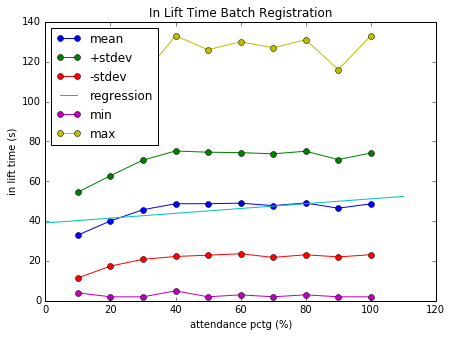

In [11]:
plot_stats(batch_reg_stats,"in_lift",xlabel="attendance pctg (%)",ylabel="in lift time (s)",title="In Lift Time Batch Registration")

in_lift_time = B0 + B1 * occupancy_percentage
Our Hypothesis for Average In Lift Time in the Batch Registration Scenario:
- H0 -> B1 = 0 (there is no relation within occupancy percentage and in lift time)
- H1 -> B1 != 0

Based on the statistic observation above, we can see that there is linear positvie relation between increasing hotel occupancy and people spend time in the lift while travel. The linear model can be described by 39.0549 + 0.1211 * occupancy_percentage, means every increasing value of occupancy percentage the spend time in lift in the evacuation scenario will be increasing by 0.1211 second.

Furthermore, the p_value for the coefficient is 0.024 which is less than 0.05 for 95% confidence level. This describes that the coefficient is significant to correlate the occupancy percentage and in lift_time. Therefore, we reject our null hypothesis and accept the hypothesis there is positive linear relation within occupancy percentage and in lift time.

# Normal Schedule

In [12]:
normal_stats,normal_data = compute_statistic("analysis_log_new/normal_attendance_{}.log",percentage_list)

## Average Waiting Time

/Volumes/HD-500GB/Users/nikolausn/Applications/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:            avg_waiting   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     51.88
Date:                Sat, 09 Dec 2017   Prob (F-statistic):           9.22e-05
Time:                        20:46:14   Log-Likelihood:                -41.618
No. Observations:                  10   AIC:                             87.24
Df Residuals:                       8   BIC:                             87.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -22.6013     11.862     -1.905      0.0

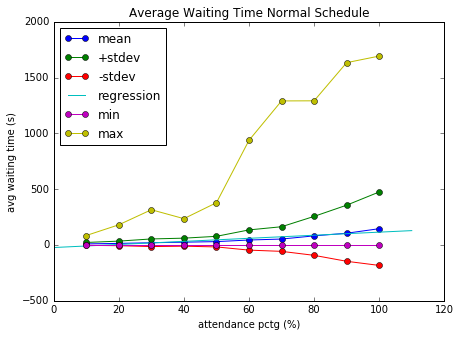

In [13]:
plot_stats(normal_stats,"waiting",xlabel="attendance pctg (%)",ylabel="avg waiting time (s)",title="Average Waiting Time Normal Schedule")

waiting_time = B0 + B1 * occupancy_percentage
Our Hypothesis for Average Waiting Time in the Normal Schedule Scenario:
- H0 -> B1 = 0 (there is no relation within occupancy percentage and average waiting time)
- H1 -> B1 != 0

Based on the statistic observation above, we can see that there is linear positive relation between increasing hotel occupancy and average lift waiting time in the batch registration scenario. The linear model can be described by -22.6013 + 1.3771  * occupancy_percentage, means every increasing value of occupancy percentage the average lift waiting time will be increased by 1.3771 s.

Furthermore, the p_value for the slope is close to zero for 99% confidence level, which describes that the coefficient is highly significant to associate occupancy percentage and average waiting time. Therefore, we reject our null hypothesis and accept the hypothesis that there is significant positive linear relation within occupancy percentage and average waiting time. 

## Average In Lift Time

/Volumes/HD-500GB/Users/nikolausn/Applications/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:            avg_in_lift   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                 -0.102
Method:                 Least Squares   F-statistic:                    0.1677
Date:                Sat, 09 Dec 2017   Prob (F-statistic):              0.693
Time:                        20:46:15   Log-Likelihood:                -22.868
No. Observations:                  10   AIC:                             49.74
Df Residuals:                       8   BIC:                             50.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         26.8712      1.819     14.772      0.0

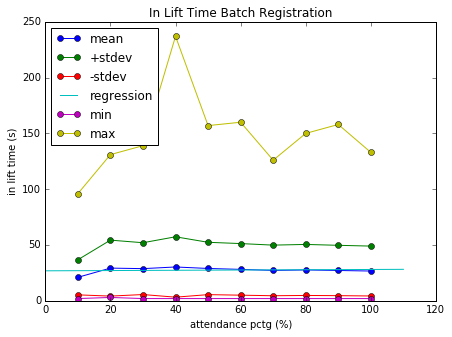

In [14]:
plot_stats(normal_stats,"in_lift",xlabel="attendance pctg (%)",ylabel="in lift time (s)",title="In Lift Time Batch Registration")

in_lift_time = B0 + B1 * occupancy_percentage
Our Hypothesis for Average In Lift Time in the Normal Schedule Scenario:
- H0 -> B1 = 0 (there is no relation within occupancy percentage and in lift time)
- H1 -> B1 != 0

Based on the statistic observation above, we can see that there no relation within the occupancy percentage and the In lift time for the normal schedule scenario. Although we can provide a linear model 26.8712 + 0.0120 * occupancy_percentage, the p_value for the slope is 0.693 which is higher than 0.05 (for 95% confidence interval).

Therefore for the in lift time in normal schedule scenario, we accept our null hypothesis and state that there is no significant relation within occupancy percentage and people spending time in lift

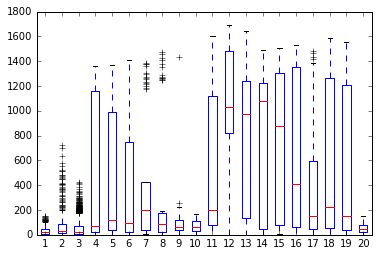

In [15]:
data = []
data_plot = normal_data[100]
for x in sorted(data_plot["from"].unique()):
    data.append(data_plot[data_plot["from"]==x].waiting)
bplot = plt.boxplot(data)